In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [5]:
DATA = '../data/'

In [8]:
from scipy.misc import imsave, fromimage, toimage
from PIL import Image, ImageOps

WIDTH = HEIGHT = 224
def load_and_crop_image(filename, target_size):
    return ImageOps.fit(Image.open(filename), target_size)

## Carga imágenes

In [15]:
gatos = np.array([fromimage(load_and_crop_image(DATA+'/gatos/cat.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])
perros = np.array([fromimage(load_and_crop_image(DATA+'/gatos/dog.{:04}.jpg'.format(i), (WIDTH, HEIGHT))) for i in range(100)])

imágenes = np.concatenate((gatos, perros), axis=0)
labels = np.zeros(len(gatos) + len(perros), dtype=int)
labels[:len(gatos)] = 1

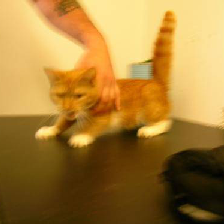

In [16]:
toimage(imágenes[0])

## Dividirlas en grupos

In [13]:
características = np.load(DATA+'/feats/all_feats.npy')
indices1 = np.load(DATA+'/feats/indices1.npy')
indices2 = np.load(DATA+'/feats/indices2.npy')

In [20]:
imágenes1 = imágenes[indices1]
car1 = características[indices1]
imágenes2 = imágenes[indices2]
car2 = características[indices2]

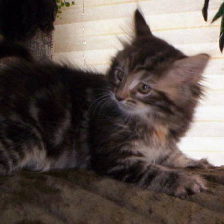

In [19]:
toimage(imágenes1[0])

In [21]:
car1[0]

array([  1.        ,   0.65449065,  85.2480203 ])